In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.fire_data import *
from src.data.read_data import *
from src.gen_functions import *
import seaborn as sns
output_notebook()
# set font size 
plt.rcParams.update({'font.size': 16})

from datetime import timedelta

Loading BokehJS ...

In [2]:
import geopandas as gpd
import fiona
from shapely.geometry import Polygon, MultiPoint, Point

In [3]:
polygon = Polygon([(0, 0), (1, 1), (1, 0),(0, 0)])

In [4]:
lat_point_list = [50.854457, 52.518172, 50.072651, 48.853033, 50.854457]
lon_point_list = [4.377184, 13.407759, 14.435935, 2.349553, 4.377184]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))

In [5]:
shapefile = 'C:/Users/Benny/Documents/Fern/aqi_thailand2/data/world_maps/ne_110m_admin_0_countries.shp'

In [14]:
gdf = fiona.open(shapefile) 
gdf = gpd.GeoDataFrame(gdf) 
gdf.set_geometry('geometry')

TypeError: Input must be valid geometry objects: {'type': 'MultiPolygon', 'coordinates': [[[(180.0, -16.067132663642447), (180.0, -16.555216566639196), (179.36414266196414, -16.801354076946883), (178.72505936299711, -17.01204167436804), (178.59683859511713, -16.639150000000004), (179.0966093629971, -16.433984277547403), (179.4135093629971, -16.379054277547404), (180.0, -16.067132663642447)]], [[(178.12557, -17.50481), (178.3736, -17.33992), (178.71806, -17.62846), (178.55271, -18.15059), (177.93266000000003, -18.28799), (177.38146, -18.16432), (177.28504, -17.72465), (177.67087, -17.381140000000002), (178.12557, -17.50481)]], [[(-179.79332010904864, -16.020882256741224), (-179.9173693847653, -16.501783135649397), (-180.0, -16.555216566639196), (-180.0, -16.067132663642447), (-179.79332010904864, -16.020882256741224)]]]}

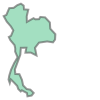

In [15]:
th_poly = gdf.iloc[91]['geometry']
Polygon(th_poly['coordinates'][0])

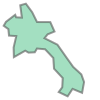

In [13]:
th_poly = gdf.iloc[91]['geometry']
Polygon(th_poly['coordinates'][0])
th_poly = gdf.iloc[92]['geometry']
Polygon(th_poly['coordinates'][0])

In [9]:
poly = Polygon(((0, 0), (0, 1), (1, 1), (1, 0)))

In [10]:
point = Point([0.5,0.5])

In [11]:
point.within(poly)

True

In [12]:
poly.contains(point)

True

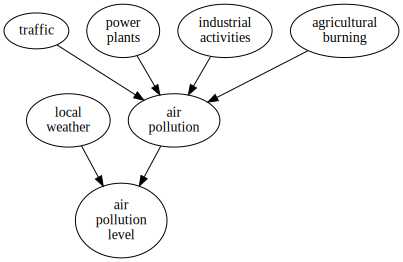

In [10]:
pollution = CausalGraphicalModel(
    nodes=["agricultural\nburning", "traffic", "power\nplants", "industrial\nactivities", "local\nweather", "air\npollution", "air\npollution\nlevel"],
    edges=[
        ("agricultural\nburning", "air\npollution"), 
        ("traffic", "air\npollution"), 
        ("power\nplants", "air\npollution"),
        ("industrial\nactivities", "air\npollution"), 
        ("air\npollution", "air\npollution\nlevel"),
        ("local\nweather", "air\npollution\nlevel")
    ]
)

# draw return a graphviz `dot` object, which jupyter can render
pollution.draw()